In [1]:
%%capture
%run ./1_prep_dataset.ipynb

## Mark Missing Values

A value of zero does not make sense for the height of a tree and indicates an invalid or missing value

In [2]:
# count the number of values equal to 0 for each column
num_missing = (df[['hauteur_m', 'circonference_cm']] == 0).sum()
# report the results
print(num_missing)

hauteur_m           24853
circonference_cm    11803
dtype: int64


marking missing values with nan values

In [3]:
# replace '0' values with 'nan'
df[['hauteur_m','circonference_cm']] = df[['hauteur_m','circonference_cm']].replace(0, np.nan)

Also a tree height greater than 50 meters is not possible in Paris see the link below: [Records hauteur des arbres a Paris](https://www.monumentaltrees.com/fr/recordsdhauteur/fra/paris/)

In [4]:
# count the number of values greather than 50
len(df[df['hauteur_m'] >= 50])

448

In [5]:
# replace values greather than 50m with 'nan'
df.loc[df.hauteur_m >= 50, 'hauteur_m'] = np.nan

In [6]:
df[['hauteur_m', 'circonference_cm']].isnull().sum()

hauteur_m           25301
circonference_cm    11803
dtype: int64

### Fill missing values with Mean of Group

We can fill the missing values using group level statistics.

In [7]:
df['hauteur_m'].fillna(df.groupby('genre')['hauteur_m'].transform('mean'), inplace = True)

## Outlier Identification and Replacement

### Identify outliers with boxplot

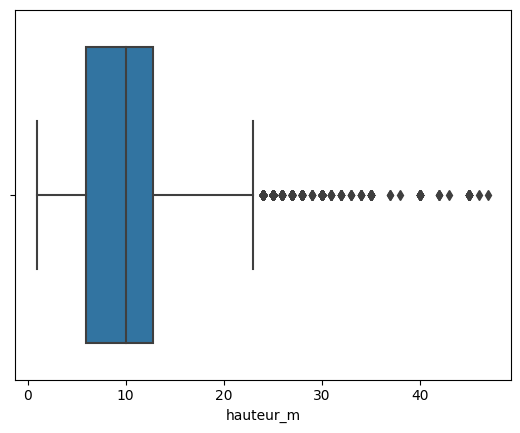

In [8]:
sns.boxplot(x=df['hauteur_m']);

### Identify outliers with Standard Deviation Method

In [9]:
# calculate summary statistics
data_mean, data_std = np.mean(df.hauteur_m), np.std(df.hauteur_m)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(data_mean, data_std, lower, upper)

10.120300822881946 4.768587765782791 -4.185462474466428 24.426064120230322


In [10]:
# identify outliers
outliers = [x for x in df.hauteur_m if x < lower or x > upper]
min(outliers)
# max(outliers)

25.0

### Identify outliers with Interquartile Range Method

In [11]:
from numpy import percentile
# calculate interquartile range
data = df.hauteur_m[df.hauteur_m.notnull()]
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=6.000, 75th=12.812, IQR=6.812


In [12]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
outliers.sort()
min(outliers)

Identified outliers: 2438


24.0

### Replacing Outliers with uper bound Value

In [13]:
df['hauteur_m'] = np.where(df['hauteur_m'] > upper, upper, df['hauteur_m'])

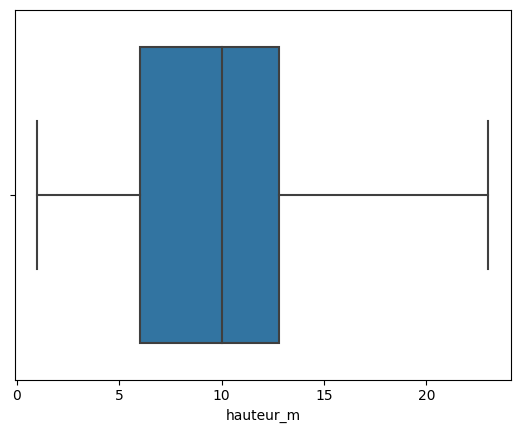

In [14]:
sns.boxplot(x=df['hauteur_m']);

### Drop rows that has NaN values on hauteur_m columns

In [15]:
df=df.dropna(subset=['hauteur_m'])

In [16]:
len(df[df.hauteur_m.isnull()])

0